In [8]:
# Importing the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading the dataset 
df = pd.read_excel('OneDrive/DataAnalyst_Assesment_Dataset.xlsx')
df.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Subscription Type,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,Customer 1,Facility,2025-05-30,Pending,NaN,NaN,10:00:00,90.0,42.74,Party Room,NaN,NaN,Party Room,Facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,Customer 2,Birthday Party,2025-05-29,Pending,NaN,NaN,NaN,NaN,182.06,Party Room,Superhero,NaN,Party Room,Birthday Party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,Customer 3,Birthday Party,2025-05-09,Confirmed,NaN,NaN,11:00:00,120.0,207.50,Play Area,NaN,NaN,Play Area,Facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,Customer 4,Birthday Party,2025-06-07,Pending,NaN,NaN,12:00:00,90.0,203.20,Play Area,NaN,NaN,Play Area,Birthday Party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,Customer 5,Class,2025-04-13,Pending,Art,NaN,15:00:00,120.0,161.14,NaN,NaN,NaN,Art,Class,customer5@example.com,001-718-3794


In [14]:
# Data Cleaning 
# 1- Removing subscription column _ no values
df.drop(columns= ['Subscription Type'],inplace = True)

In [16]:
# 2-Finding missing values 
df.isnull().sum()

Booking ID           0
Customer ID          0
Customer Name        0
Booking Type         0
Booking Date         0
Status               0
Class Type         672
Instructor         730
Time Slot          205
Duration (mins)    205
Price                0
Facility           328
Theme              727
Service Name         0
Service Type         0
Customer Email      94
Customer Phone     105
dtype: int64

In [18]:
# 3-Handling missing values 
# unknown/missing for categorical
# Mode /median for numerical
df['Class Type']=df['Class Type'].fillna("Unknown" )
df['Instructor']=df['Instructor'].fillna("Unknown")
df['Time Slot']=df['Time Slot'].fillna(df['Time Slot'].mode()[0]) #Fills the most common time
df['Duration (mins)'] = df['Duration (mins)'].fillna(df['Duration (mins)'].median()) # fills with median
df['Facility']=df['Facility'].fillna("Unknown")
df['Theme']=df['Theme'].fillna("Unknown")
df['Customer Email']=df['Customer Email'].fillna("Missing")
df['Customer Phone']=df['Customer Phone'].fillna("Missing")

In [20]:
# 4 - changing Time slot to proper format 
df['Time Slot'] = pd.to_datetime(df['Time Slot'], format = '%H:%M:%S').dt.time

In [22]:
# 5 - Duplicate Booking-Ids
df.drop_duplicates(subset = ['Booking ID'],inplace =True)

In [24]:
# 6 - Standarize Text Formatting 
textcol =['Customer Name', 'Booking Type', 'Status', 'Class Type', 'Facility', 'Theme', 'Service Name', 'Service Type']
for col in textcol:
    df[col] =df[col].astype(str).str.strip().str.lower()
    

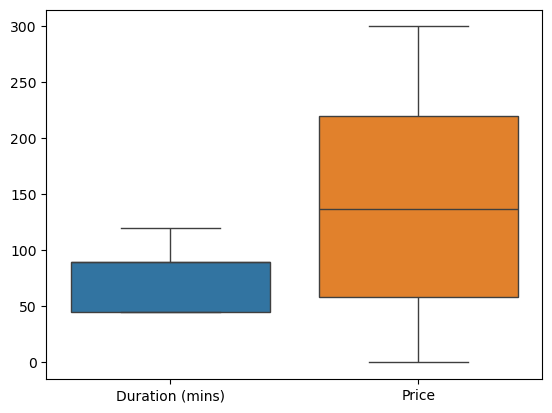

In [26]:
# 7 - Checking Outliers fro Price column
sns.boxplot(df)
plt.show()  #no outliers found

In [28]:
# 8 - Email format checking 
df = df[df['Customer Email'].str.match(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$') | (df['Customer Email'] == "Missing")]

In [30]:
df.head()

,Booking ID,Customer ID,Customer Name,Booking Type,Booking Date,Status,Class Type,Instructor,Time Slot,Duration (mins),Price,Facility,Theme,Service Name,Service Type,Customer Email,Customer Phone
0,279d92c6-ce26-47c0-8915-e45b77fe20e2,00901ce3-3d86-4c97-bca2-40ccac2fb99f,customer 1,facility,2025-05-30,pending,unknown,Unknown,10:00:00,90.0,42.74,party room,unknown,party room,facility,customer1@example.com,001-730-9034
1,415bfcbe-1a2e-4d4b-809a-4c5b606653b1,b82db986-bd52-4b07-bdd8-aa8cf2016241,customer 2,birthday party,2025-05-29,pending,unknown,Unknown,14:00:00,90.0,182.06,party room,superhero,party room,birthday party,customer2@example.com,001-537-5668
2,2100024b-46fc-47b5-ac1c-047d007a4723,6bbb6e83-9577-4f64-80b0-f073132d18f3,customer 3,birthday party,2025-05-09,confirmed,unknown,Unknown,11:00:00,120.0,207.50,play area,unknown,play area,facility,customer3@example.com,001-880-7769
3,74936def-088f-4d34-bad1-dfa76f78b704,f16f5beb-6a7d-4493-a19e-a30dbbd206e9,customer 4,birthday party,2025-06-07,pending,unknown,Unknown,12:00:00,90.0,203.20,play area,unknown,play area,birthday party,customer4@example.com,001-491-3107
4,6272b4e7-a508-4ed7-bae0-21f7293287a8,eb297435-93d1-4e65-8dd4-6450922305cb,customer 5,class,2025-04-13,pending,art,Unknown,15:00:00,120.0,161.14,unknown,unknown,art,class,customer5@example.com,001-718-3794


In [33]:
df.to_excel('OneDrive/DataAnalyst_Assesment_Dataset.xlsx', index= False)

In [34]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Booking ID       1000 non-null   object        
 1   Customer ID      1000 non-null   object        
 2   Customer Name    1000 non-null   object        
 3   Booking Type     1000 non-null   object        
 4   Booking Date     1000 non-null   datetime64[ns]
 5   Status           1000 non-null   object        
 6   Class Type       1000 non-null   object        
 7   Instructor       1000 non-null   object        
 8   Time Slot        1000 non-null   object        
 9   Duration (mins)  1000 non-null   float64       
 10  Price            1000 non-null   float64       
 11  Facility         1000 non-null   object        
 12  Theme            1000 non-null   object        
 13  Service Name     1000 non-null   object        
 14  Service Type     1000 non-null   object  

(None,
                              Booking ID                           Customer ID  \
 0  279d92c6-ce26-47c0-8915-e45b77fe20e2  00901ce3-3d86-4c97-bca2-40ccac2fb99f   
 1  415bfcbe-1a2e-4d4b-809a-4c5b606653b1  b82db986-bd52-4b07-bdd8-aa8cf2016241   
 2  2100024b-46fc-47b5-ac1c-047d007a4723  6bbb6e83-9577-4f64-80b0-f073132d18f3   
 3  74936def-088f-4d34-bad1-dfa76f78b704  f16f5beb-6a7d-4493-a19e-a30dbbd206e9   
 4  6272b4e7-a508-4ed7-bae0-21f7293287a8  eb297435-93d1-4e65-8dd4-6450922305cb   
 
   Customer Name    Booking Type Booking Date     Status Class Type Instructor  \
 0    customer 1        facility   2025-05-30    pending    unknown    Unknown   
 1    customer 2  birthday party   2025-05-29    pending    unknown    Unknown   
 2    customer 3  birthday party   2025-05-09  confirmed    unknown    Unknown   
 3    customer 4  birthday party   2025-06-07    pending    unknown    Unknown   
 4    customer 5           class   2025-04-13    pending        art    Unknown   
 
   Ti